# Corporate Credit Rating Forecast using Machine Learning Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
import warnings

In [2]:
# Load the processed data directly
input_data = pd.read_csv('./input_corporate_rating.csv')
input_data.head()

,Rating,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,2,2,0.040496,0.310105,0.367135,0.865746,2.530468,2.457283,2.932322,2.366888,...,2.278827,2.892300,-0.063314,-1.794528,2.699027,2.457283,2.401567,0.270644,0.815123,0.597818
1,3,2,0.060134,0.323287,0.498169,0.863098,2.530496,2.457281,2.932295,2.366906,...,2.278272,2.892673,-0.063156,-1.753598,2.698882,2.457281,2.401498,0.270657,0.815948,0.598335
2,3,2,0.044558,0.314758,0.399070,0.869096,2.530448,2.457265,2.932154,2.366882,...,2.278878,2.892570,-0.063063,-1.776295,2.699041,2.457265,2.401964,0.270764,0.816635,0.595537
3,3,2,0.057122,0.325481,0.467584,0.864203,2.530398,2.457066,2.931202,2.366822,...,2.285724,2.890202,-0.063998,-1.769110,2.698963,2.457066,2.401223,0.270331,0.812212,0.601430
4,3,2,0.043226,0.322780,0.425078,0.867545,2.530491,2.457298,2.932353,2.366902,...,2.278673,2.892349,-0.063286,-1.770084,2.699027,2.457298,2.401710,0.270653,0.815068,0.597556


Our problem of corporate credit rating forecast is a supervised multi-class classification task. 

# Training and Test Data

We split our input data into training (80%) and test data (20%) using `train_test_split()` from `sklearn.model_selection`. Then we create separate dataframes for the input features (X) and target lables (y)

In [3]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(input_data, test_size=0.2, random_state = 2996)

In [4]:
# Create separate dataframes for input features and target lables 
X_train, y_train = train_df.iloc[:,1:27], train_df.iloc[:,0]
X_test, y_test = test_df.iloc[:,1:27], test_df.iloc[:,0]

print('Training Size:', X_train.shape, y_train.shape)
print('Test Size:', X_test.shape, y_test.shape)

print('Distribution of Ratings in Train Set:\n', y_train.value_counts())

Training Size: (1616, 26) (1616,)
Test Size: (405, 26) (405,)
Distribution of Ratings in Train Set:
 0    636
3    535
2    394
1     51
Name: Rating, dtype: int64


# Models

Various machine learning models are employed to forecast corporate credit ratings. 

**1. Logistic Regression:**
Logistic Regression is a linear model used for binary or multiclass classification. It estimates the probability that a given instance belongs to a particular class. It employs the logistic function (sigmoid) to transform a linear combination of input features into a value between 0 and 1. This output represents the probability of belonging to the positive class. A threshold is applied to make the final classification decision.

**2. K-Nearest Neighbors (KNN):** 
KNN is a non-parametric algorithm used for classification. It classifies a data point based on the majority class among its k-nearest neighbors.
The algorithm calculates the distance between the input instance and all data points in the training set. It then assigns the class that is most common among the k-nearest neighbors.

**3. Support Vector Machine (SVM):**
SVM is a powerful classification algorithm that aims to find a hyperplane in a high-dimensional space that best separates data points of different classes. SVM transforms input features into a higher-dimensional space and seeks a hyperplane that maximizes the margin between classes. It classifies instances based on which side of the hyperplane they fall on.

**4. Random Forest:**
Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification tasks. It builds multiple decision trees using a subset of features and a random subset of the training data. The final prediction is determined by aggregating the predictions of individual trees (voting or averaging).

**5. Gradient Boost:**
Gradient Boosting is an ensemble learning method that builds a series of weak learners (typically decision trees) sequentially, each correcting the errors of its predecessor. It fits a weak model to the residuals of the previous model. This process continues, with each new model focusing on the mistakes of the ensemble. The final prediction is a weighted sum of the predictions from all weak models.

**6. XGBoost:**
XGBoost (Extreme Gradient Boosting) is an advanced version of gradient boosting that incorporates regularization and parallel processing, making it highly efficient. Similar to gradient boosting, XGBoost builds a series of trees sequentially. It optimizes a regularized objective function, combining the prediction from each tree. It uses a technique called boosting to strengthen the model iteratively.

The models are then trained on the training dataset `(X_train, y_train)` and evaluated on the test dataset `(X_test, y_test)`. The accuracy of each model is calculated using the `metrics.accuracy_score` function from `scikit-learn`. The results, including model predictions and their corresponding accuracies, are stored in the `predictions` and `accuracies` lists, respectively.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics


models = {
    'Logistic Regression': LogisticRegression(random_state=2996 , multi_class='multinomial', solver='newton-cg'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors = 4),
    'Support Vector Machine': svm.SVC(kernel='rbf', gamma= 1.5, C = 4, random_state=2996),
    'Random Forest':  RandomForestClassifier(random_state=2996),
    'Gradient Boost': GradientBoostingClassifier(random_state=2996),
    'XGBoost': xgb.XGBClassifier(objective ='multi:softmax', num_class=4),
}

model_list = list(models.keys())
predictions = []
accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    predictions.append((model_name, y_pred))
    accuracies.append((model_name, accuracy))

    print(f"{model_name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.39753086419753086
K-Nearest Neighbors Accuracy: 0.5777777777777777
Support Vector Machine Accuracy: 0.508641975308642
Random Forest Accuracy: 0.6962962962962963
Gradient Boost Accuracy: 0.6469135802469136
XGBoost Accuracy: 0.7037037037037037


# SMOTE

The Synthetic Minority Over-sampling Technique (SMOTE) is employed to address the issue of class imbalance in the training dataset. The training dataset is characterized by a disproportionate representation of certain credit rating classes as seen from `y_train.value_counts()`, and this can lead to biased model predictions. The SMOTE algorithm is applied to generate synthetic instances of the minority class, thereby balancing the distribution of ratings. By doing so, it ensures that the machine learning models are exposed to a more representative training set, enhancing their ability to generalize and make accurate predictions across different credit rating categories. The resulting distribution of ratings in the resampled training set demonstrates the effectiveness of SMOTE in mitigating class imbalance.

In [6]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=2996)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Distribution of Ratings in Train Set After resampling: \n', y_train_resampled.value_counts())

Distribution of Ratings in Train Set After resampling: 
 0    636
3    636
2    636
1    636
Name: Rating, dtype: int64


Now, we train the models again with the resampled dataset `(X_train_resampled, y_train_resampled)` and evaluate it on `(X_test, y_test)`. The new model predictions and their corresponding accuracies, are stored in the `smote_predictions` and `smote_accuracies` lists, respectively.

In [7]:
smote_predictions = []
smote_accuracies = []

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    smote_accuracy = metrics.accuracy_score(y_test, y_pred)
    
    smote_predictions.append((model_name, y_pred))
    smote_accuracies.append((model_name, smote_accuracy))

    print(f"{model_name}- Resampled Accuracy: {smote_accuracy}")

Logistic Regression- Resampled Accuracy: 0.3358024691358025
K-Nearest Neighbors- Resampled Accuracy: 0.5432098765432098
Support Vector Machine- Resampled Accuracy: 0.4962962962962963
Random Forest- Resampled Accuracy: 0.6641975308641975
Gradient Boost- Resampled Accuracy: 0.6197530864197531
XGBoost- Resampled Accuracy: 0.6888888888888889


It is observed that the accuracy slightly decreased after employing SMOTE. This phenomenon could be attributed to the introduction of synthetic samples, potentially leading to increased noise and complexity in the dataset. Moreover, the choice of sampling strategy in SMOTE, such as `'auto'`, might have not been optimal for our problem. Alternative methods, including undersampling or experimenting with different SMOTE sampling strategies, could be considered. Keeping in mind that the decision to use or omit SMOTE is usually guided by a comprehensive analysis of the specific dataset characteristics and the performance trade-offs associated with different sampling techniques, we can omit SMOTE resampling in our case.

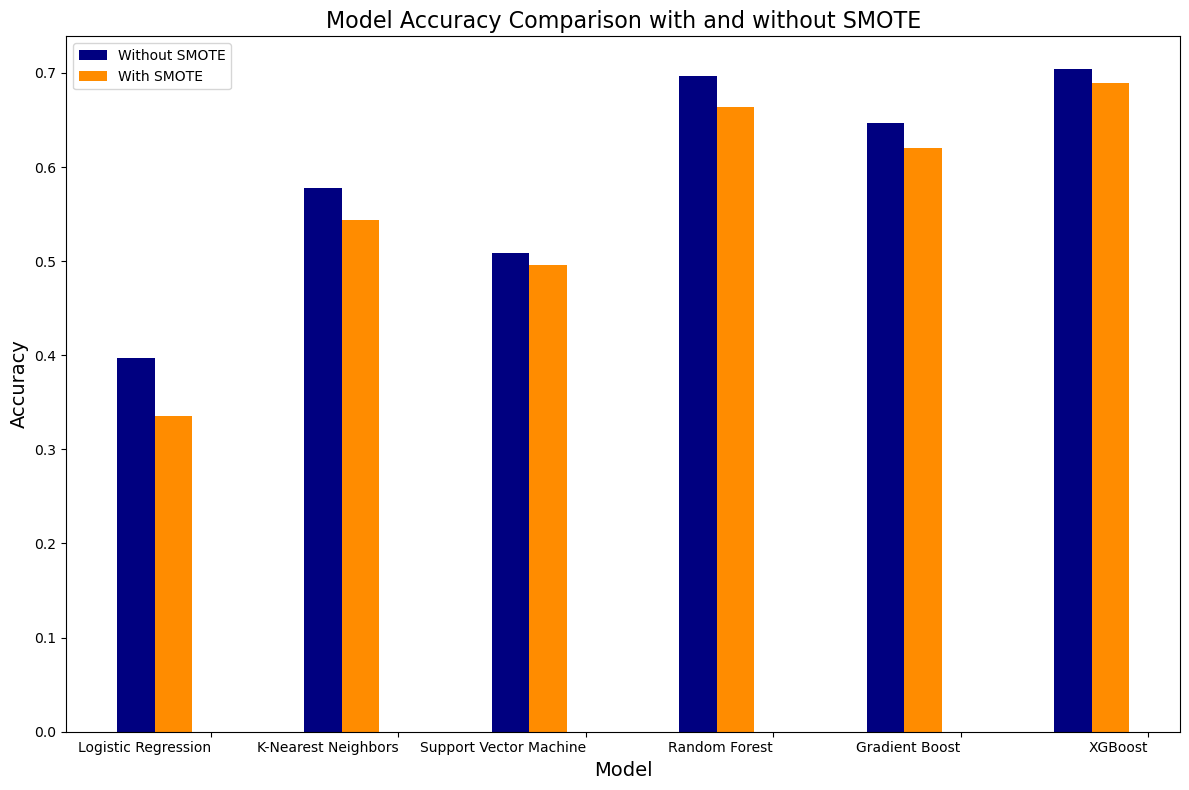

In [8]:
df_accuracy = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_smote_accuracy = pd.DataFrame(smote_accuracies, columns=['Model', 'Accuracy'])

models = df_accuracy['Model']
accuracy_without_smote = df_accuracy['Accuracy']
accuracy_with_smote = df_smote_accuracy['Accuracy']

bar_width = 0.2 
index = np.arange(len(models))  

plt.figure(figsize=(12, 8))

# Plot the first set of bars without SMOTE
plt.bar(index, accuracy_without_smote, width=bar_width, color='navy', label='Without SMOTE')

# Plot the second set of bars with SMOTE
plt.bar(index + bar_width, accuracy_with_smote, width=bar_width, color='darkorange', label='With SMOTE')

plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Comparison with and without SMOTE', fontsize=16)
plt.xticks(index + 2*bar_width , models, rotation=0, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()

plt.show()

# Hyperparameter Optimisation

We perform hyperparameter optimization for the XGBoost model. 

`RandomizedSearchCV` is a method for hyperparameter tuning that explores a defined number of random combinations of hyperparameters. In our case `n_iter=15` and it searches through 15 different combinations. `StratifiedKFold` is employed for cross-validation. It ensures that each fold preserves the same distribution of target classes as the entire dataset, which is crucial for maintaining the representation of different credit ratings in each fold.  

`xgb_params` defines a grid of hyperparameters to search through. XGBoost parameters such as learning rate, number of estimators, maximum depth, minimum child weight, subsample, and colsample by tree are considered. The metric used for evaluation is accuracy `(scoring='accuracy')`. The search is parallelized `(n_jobs=-1)`, making use of all available CPU cores. The model is fitted to the training data to identify the best hyperparameters. The best model with optimal hyperparameters is then extracted from the search results. Finally, the best model is evaluated on the test set, and the accuracy is noted.


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

xgb_params = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
 
# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2996)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator= xgb.XGBClassifier(objective ='multi:softmax', num_class=4),
    param_distributions=xgb_params,
    n_iter=15,  
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    random_state=2996
)

# Fit the model to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best model with optimal hyperparameters
best_model = random_search.best_estimator_

# Evaluate the model on the test set
best_y_pred = best_model.predict(X_test)
best_accuracy = metrics.accuracy_score(y_test, best_y_pred)

print(f"Best Hyperparameters for XGBoost: {random_search.best_params_}")
print(f"Best Accuracy: {best_accuracy}")


Best Hyperparameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best Accuracy: 0.6962962962962963


# Results

C:\Users\moni2\AppData\Local\Temp\ipykernel_7316\4273105223.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


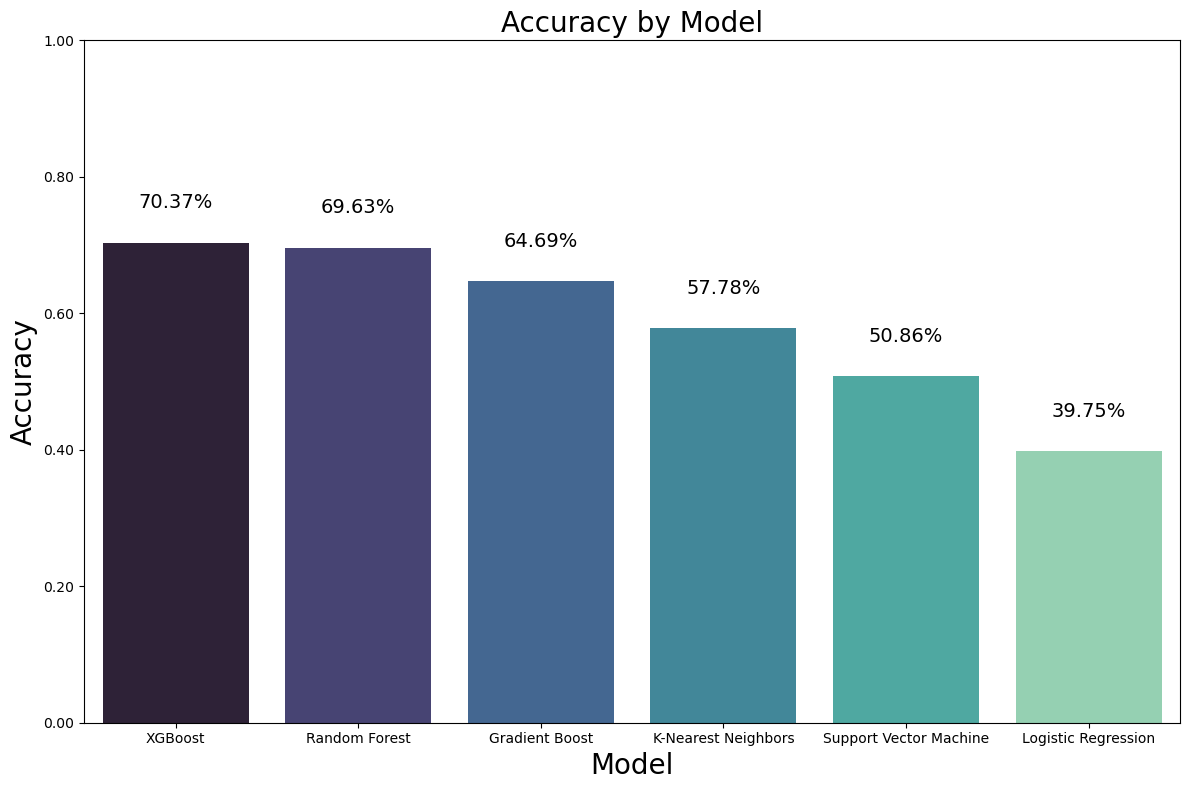

In [10]:
df_accuracy = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])

order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
ax = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="mako")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()

### Confusion Matrix

`confusion_matrix` provides insights into the performance of a classification model. It helps to understand the distribution of true positive, true negative, false positive, and false negative predictions. This information aids in assessing the model's ability to correctly classify instances into different credit rating categories.

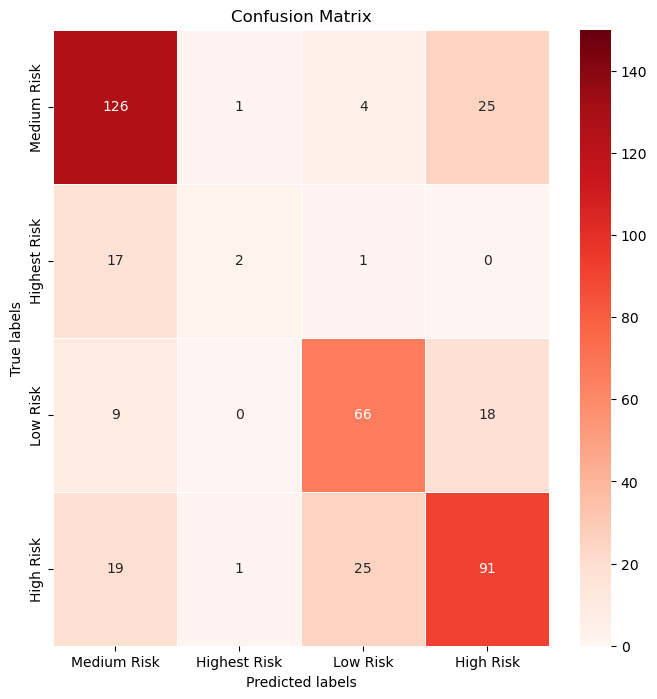

In [11]:
from sklearn.metrics import confusion_matrix

df_predictions = pd.DataFrame(predictions, columns=['Model', 'Predictions'])
xgb_y_pred = list(df_predictions[df_predictions['Model'] == 'XGBoost']['Predictions'].iloc[0])
cm = confusion_matrix(y_test, xgb_y_pred)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk'])
ax.yaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']);
plt.show()

### Classification Report

The `classification_report` provides a comprehensive summary of key classification metrics, including accuracy, precision, recall, and F1 score. 

- **Accuracy** reflects the overall correctness of the model's predictions. 
- **Precision** measures the proportion of true positive predictions among instances predicted as positive, highlighting the model's ability to avoid false positives. 
- **Recall** gauges the model's effectiveness in capturing true positives among all actual positive instances. 
- **F1 score** balances precision and recall, providing a single metric that considers both false positives and false negatives. 


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb_y_pred, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.74      0.81      0.77       156
Highest Risk       0.50      0.10      0.17        20
    Low Risk       0.69      0.71      0.70        93
   High Risk       0.68      0.67      0.67       136

    accuracy                           0.70       405
   macro avg       0.65      0.57      0.58       405
weighted avg       0.69      0.70      0.69       405



### Feature Importance Plot

The feature importance plot for XGBoost illustrates the contribution of each input feature to the model's decision-making process. This is particularly useful in understanding which financial indicators or ratios play a significant role in predicting credit ratings. Analyzing feature importance guides financial analysts and stakeholders in focusing on key metrics that heavily influence the model's predictions. 

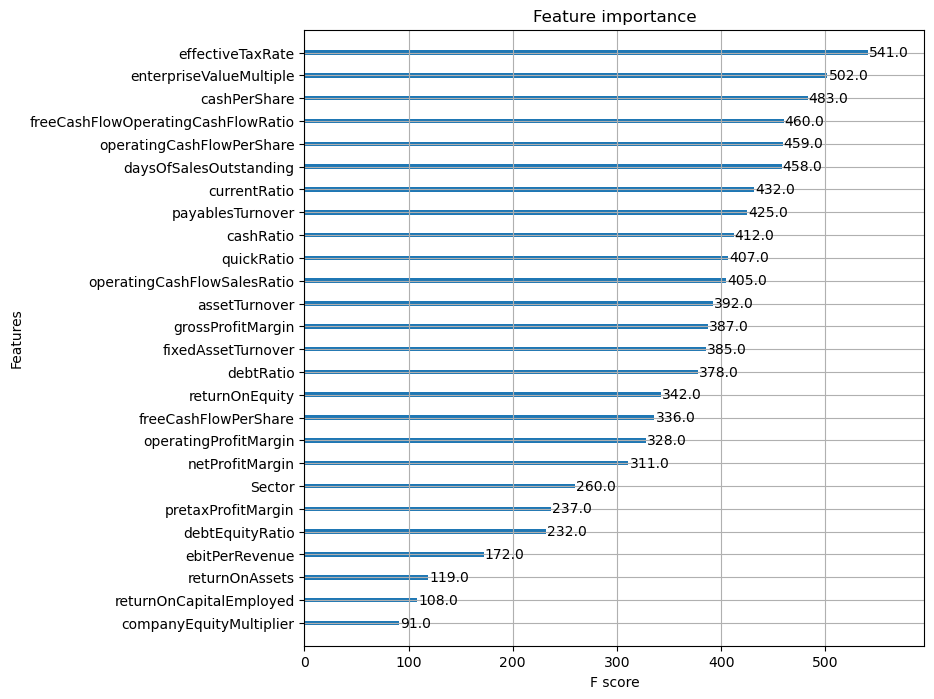

In [13]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(8, 8))
xgb_model = xgb.XGBClassifier(objective ='multi:softmax', num_class=4)
xgb_model.fit(X_train, y_train)
plot_importance(xgb_model, ax=ax)
plt.show()